<a href="https://colab.research.google.com/github/senchiao/HRRR_plots/blob/main/GOES_ABI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cartopy
!pip install metpy
!pip install siphon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.4/424.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.8/306.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 23 21:38:27 2023

@author: sen.chiao
"""
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import metpy
from metpy.plots import add_timestamp
import numpy as np
from siphon.catalog import TDSCatalog


def open_dataset(date, channel, idx, region):
  """
  Open and return dataset from GOES from given parameters
  """
  cat = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/'
                     f'CloudAndMoistureImagery/{region}/Channel{channel:02d}/{date:%Y%m%d}/catalog.xml')

  ds = cat.datasets[idx]
  ds = ds.remote_access(use_xarray=True)
  return ds

Text(0.99, 0.01, 'GOES 16 04 November 2025 1821Z')

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


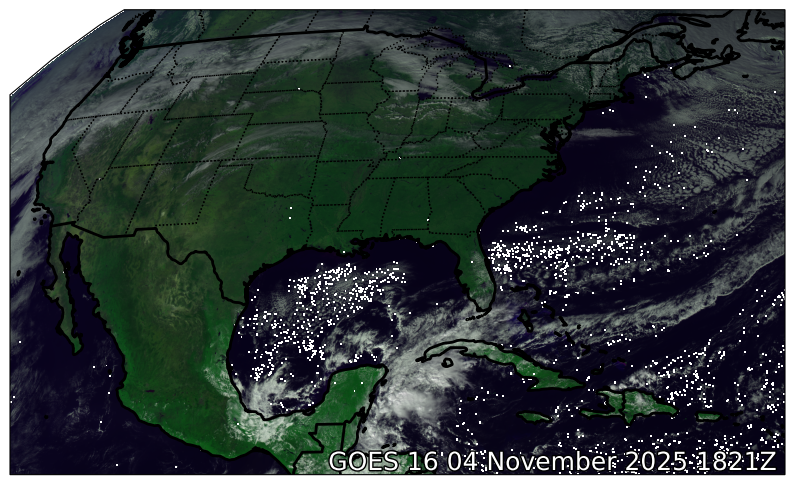

In [ ]:
date = datetime(2025, 11, 4)
region = 'CONUS'
idx = 220

red_ds = open_dataset(date, 2, idx, region) # 2 is the channel #
veggie_ds = open_dataset(date, 3, idx, region)
blue_ds = open_dataset(date, 1, idx, region)

data = {'red': np.clip(red_ds['Sectorized_CMI'][::2,::2], 0, 1),
        'veggie': np.clip(veggie_ds['Sectorized_CMI'], 0, 1),
        'blue': np.clip(blue_ds['Sectorized_CMI'], 0, 1)}

data['color_image']=np.dstack((data['red'], data['veggie'], data['blue']))

dat = blue_ds.metpy.parse_cf('Sectorized_CMI')
proj = dat.metpy.cartopy_crs
x = dat['x']
y = dat['y']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection=proj)

ax.add_feature(cfeature.COASTLINE, linewidth=2)
ax.add_feature(cfeature.STATES, linestyle=":",edgecolor='black')
ax.add_feature(cfeature.BORDERS, linewidth=2, edgecolor='black')

im = ax.imshow(data['color_image'], extent=(x.min(), x.max(), y.min(), y.max()), origin='upper')

timestamp = datetime.strptime(blue_ds.start_date_time, '%Y%j%H%M%S')
add_timestamp(ax, time=timestamp, high_contrast=True,
              pretext=f'GOES 16 ',
              time_format='%d %B %Y %H%MZ', y=0.01,
              fontsize=18)